In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df =  pd.read_csv("data.csv")

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [26]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294,294,294,294,294,294,294.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,32,154,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,23,266,235,29,204,NaN,190,291,266,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [27]:
df = df.drop(['slope','ca','thal'] , axis = 1)
#Dropping Columns due to lack of data

In [28]:
def find_mean(column):
    data = column.values
    clean_list = [int(c) for c in data if c != '?']
    mean = int(sum(clean_list) / len(clean_list))
    return mean

    

In [29]:
df['chol'] = df['chol'].replace({'?' : find_mean(df['chol'])})

In [30]:
df['trestbps'] = df['trestbps'].replace({'?' : find_mean(df['trestbps'])})

In [31]:
df['fbs'] = df['fbs'].replace({'?' : find_mean(df['fbs'])})

In [32]:
df['restecg'] = df['restecg'].replace({'?' : find_mean(df['restecg'])})

In [33]:
df['exang'] = df['exang'].replace({'?' : find_mean(df['exang'])})

In [34]:
df['thalach'] = df['thalach'].replace({'?' : find_mean(df['thalach'])})

In [35]:
columns = ['trestbps' , 'chol' , 'fbs' , 'restecg' , 'oldpeak','thalach' , 'exang']
for c in columns:
    df[c] = df[c].astype(np.int64)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         294 non-null    int64
 1   sex         294 non-null    int64
 2   cp          294 non-null    int64
 3   trestbps    294 non-null    int64
 4   chol        294 non-null    int64
 5   fbs         294 non-null    int64
 6   restecg     294 non-null    int64
 7   thalach     294 non-null    int64
 8   exang       294 non-null    int64
 9   oldpeak     294 non-null    int64
 10  num         294 non-null    int64
dtypes: int64(11)
memory usage: 25.4 KB


<AxesSubplot:>

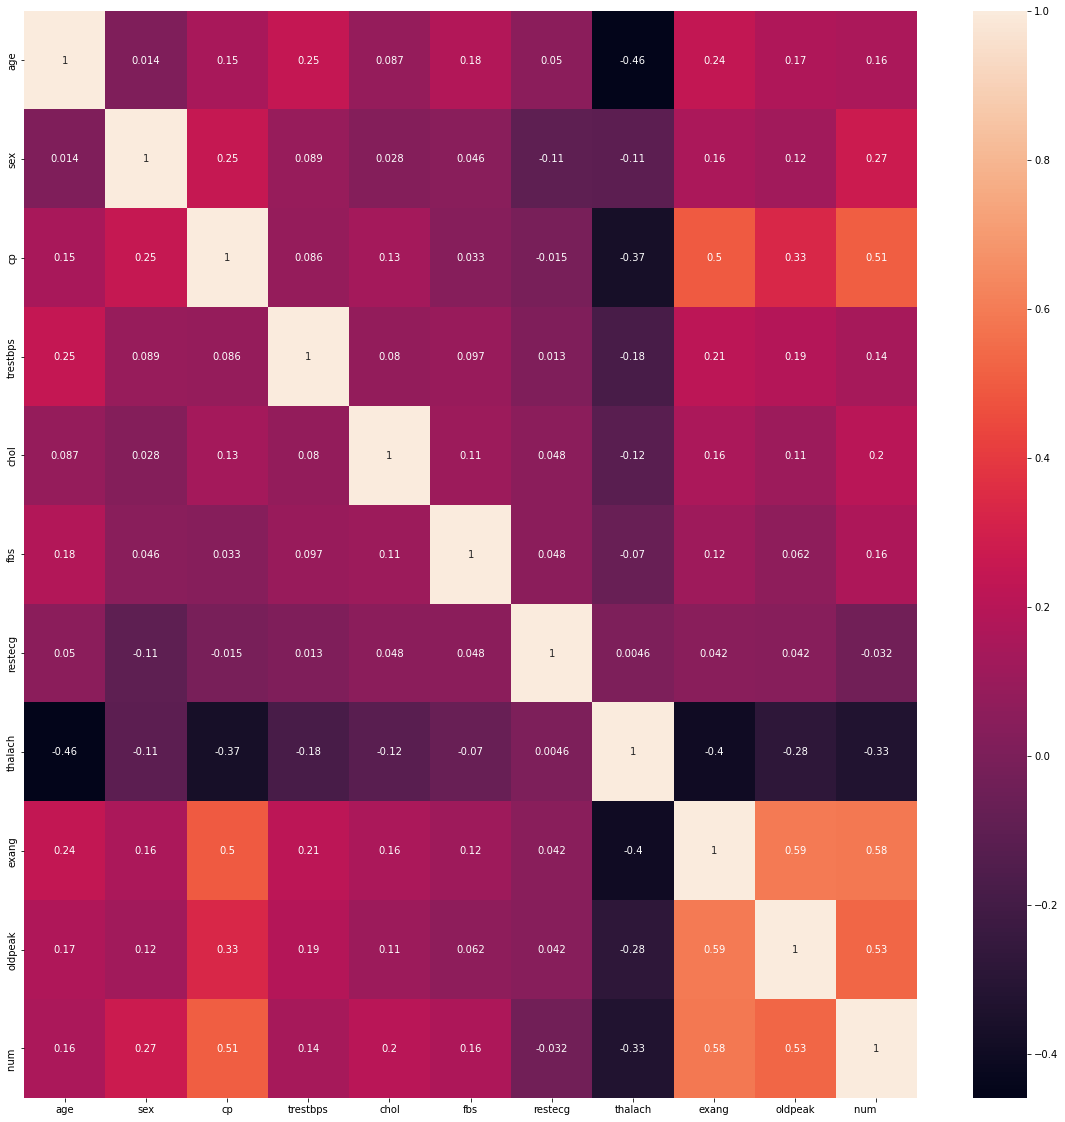

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , annot = True)

# Importing the classification models
The following models will be used for this project:
1) Logistic Regression

2) Support Vector Machine (SVM)

3) Gaussian Naive bayes (NB)

4) K-Nearest Neighbours (KNN)

5) Random Forest

We will use  K-Fold cross validation to test how each model performs to get an idea about which model is best suited for this project



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings

In [39]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,250,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2,1
290,54,0,3,130,294,0,1,100,1,0,1
291,56,1,4,155,342,1,0,150,1,3,1
292,58,0,2,180,393,0,0,110,1,1,1


In [40]:
X = df.drop(['target'] , axis = 1).values
Y = df['target'].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test , y_train,y_test = train_test_split(X,Y , test_size=0.2 , random_state=123)

In [43]:
X_test.shape

(59, 10)

In [44]:
model_list = []
model_list.append(('Logistic Regression' , LogisticRegression()))
model_list.append(('SVM' , SVC()))
model_list.append(('K-Nearest Neighbour' , KNeighborsClassifier()))
model_list.append(('Gaussian Naive Bayes' , GaussianNB()))
model_list.append(('Decision Trees' , DecisionTreeClassifier()))

In [45]:
splits = 10
scores = []
names = []

In [46]:
warnings.filterwarnings(action="ignore")

In [47]:
for name,model in model_list:
    kfold = KFold(n_splits = splits )
    results = cross_val_score(model , X_train , y_train , cv=kfold ,scoring = 'accuracy' )
    names.append(name)
    scores.append(results)
    print(f"Model name : {name} | accruracy score : {results.mean()}")
    

Model name : Logistic Regression | accruracy score : 0.8335144927536231
Model name : SVM | accruracy score : 0.6648550724637681
Model name : K-Nearest Neighbour | accruracy score : 0.6221014492753623
Model name : Gaussian Naive Bayes | accruracy score : 0.8130434782608695
Model name : Decision Trees | accruracy score : 0.7610507246376811


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
pipelines = []
pipelines.append(("Scaled LR" ,Pipeline([('Standard Scaler' , StandardScaler() ),("Logistic Regression" , LogisticRegression() )])))
pipelines.append(("Scaled SVM" ,Pipeline([('Standard Scaler' , StandardScaler() ),("Support Vector Machines" , SVC() )])))
pipelines.append(("Scaled KNN" ,Pipeline([('Standard Scaler' , StandardScaler() ),("K-Nearnest Neighbour" , KNeighborsClassifier() )])))
pipelines.append(("Scaled GNB" ,Pipeline([('Standard Scaler' , StandardScaler() ),("Gaussian Naive Bayes" , GaussianNB() )])))
pipelines.append(("Scaled DT" ,Pipeline([('Standard Scaler' , StandardScaler() ),("Decision Trees" , DecisionTreeClassifier() )])))

In [55]:
splits = 10
results = []
names = []
warnings.filterwarnings(action="ignore")
for name,pipe in pipelines:
    kfold = KFold(n_splits = splits)
    scores = cross_val_score(pipe , X_train , y_train , cv = kfold , scoring = "accuracy")
    results.append(scores.mean())
    print(f"Model name : {name}  | Accuracy score : {scores.mean()}" )

Model name : Scaled LR  | Accuracy score : 0.8552536231884058
Model name : Scaled SVM  | Accuracy score : 0.8639492753623188
Model name : Scaled KNN  | Accuracy score : 0.8208333333333334
Model name : Scaled GNB  | Accuracy score : 0.8130434782608695
Model name : Scaled DT  | Accuracy score : 0.7739130434782608


In [56]:
results

[0.8552536231884058,
 0.8639492753623188,
 0.8208333333333334,
 0.8130434782608695,
 0.7739130434782608]

We observe that SVM algorithm performs the best on Scaled data hence we will now use this algorithm for testing  

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_test_scaled

array([[ 2.16299850e+00,  5.92093500e-01,  1.03093144e+00,
         2.13004762e+00,  2.20440805e-01,  3.97312400e+00,
        -4.41950730e-01, -1.12048846e+00,  1.50462251e+00,
         1.77503475e+00],
       [ 7.65510090e-01,  5.92093500e-01,  4.36835356e-03,
        -7.57361188e-01, -2.10151688e-01, -2.51691113e-01,
        -4.41950730e-01,  4.71803386e-01,  1.50462251e+00,
         5.72921880e-01],
       [-1.14015592e+00,  5.92093500e-01, -1.02219473e+00,
        -7.57361188e-01,  5.14455843e-03, -2.51691113e-01,
         1.72176639e+00,  3.04193717e-01, -6.64618531e-01,
         1.77503475e+00],
       [ 1.01959889e+00,  5.92093500e-01,  1.03093144e+00,
         9.75084099e-01, -3.26080437e-01, -2.51691113e-01,
         1.72176639e+00, -6.17659459e-01,  1.50462251e+00,
         5.72921880e-01],
       [-1.01311152e+00,  5.92093500e-01, -1.02219473e+00,
         3.97602337e-01,  6.51033299e-01, -2.51691113e-01,
        -4.41950730e-01,  1.39365656e+00, -6.64618531e-01,
        -6.

In [70]:
SV_classifier = SVC()
classifier = SV_classifier.fit(X_train_scaled , y_train)

In [72]:
y_pred = classifier.predict(X_test_scaled)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
Accuracy_score = accuracy_score(y_test , y_pred)
Classification_report = classification_report(y_test , y_pred)
Matrix = confusion_matrix(y_test , y_pred)
print(f"Accuracy score : {Accuracy_score} ")

Accuracy score : 0.7627118644067796 


<AxesSubplot:>

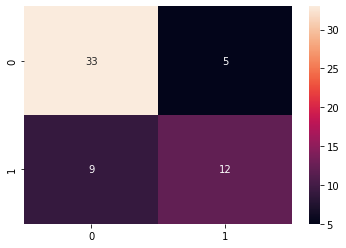

In [76]:
sns.heatmap(Matrix , annot = True)

In [79]:
print(Classification_report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.71      0.57      0.63        21

    accuracy                           0.76        59
   macro avg       0.75      0.72      0.73        59
weighted avg       0.76      0.76      0.76        59

